In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [202]:
alpha = 0.005
numberOfMovies = 400
def analysesAndTests(x, y, tailedness = 'two-sided' , kstest=0, plots=0, verbose=0):
    x = np.array(x)
    y = np.array(y)
    
    #u Test
    u, p = stats.mannwhitneyu(x, y, alternative = tailedness)
    
    if verbose == 1:
        print("Group 1 v/s Group 2")
        print("Median of Group 1 ratings:", np.median(x),
          "Median of Group 2 ratings:", np.median(y))
        print("ManWhitney test results:","test statistic =", u,"p-value =", p)
        if(p<alpha):
            print("There is a significant difference")
        else:
            print("The difference is by chance")
            
        if plots == 1:
            plt.figure(figsize=(8, 15))
            plt.subplot(3, 1, 1)
            plt.hist(x, density=True, bins=20)
            plt.title('Probabitliy density of Group 1')
            plt.subplot(3, 1, 2)
            plt.hist(y, density=True, bins=20)
            plt.title('Probabitliy density of Group 2')
            plt.subplot(3, 1, 3)
            plt.boxplot([x,y])
            plt.title('Box plot of the two groups')
    #KS Test        
    if kstest == 1:
        d, p = stats.ks_2samp(x, y, alternative = tailedness ) #kstest
        if verbose == 1:
            print("KS test results", d, p)
            if(p<alpha):
                print("There is a significant difference")
            else:
                print("The difference is by chance")
                
    if p<alpha:
        return 1
    else:
        return 0
    
    
def comparsionOnFactor(movie, factor, key1, key2, p=0, v=0, k=0, t='two-sided'):
    filteredDF = moviesRatings.filter([movie, factor])
    filteredDF.dropna(inplace=True)
    group1 = filteredDF[filteredDF[factor] == key1]
    group2 = filteredDF[filteredDF[factor] == key2]
    group1 = list(group1[movie].values)
    group2 = list(group2[movie].values)
    if v == 1:
        print("Movie:", movie, "Factor:", factor)
    significance = analysesAndTests(group1, group2, plots=p, verbose=v, kstest=k, tailedness=t)
    return significance

def proportionFinder(factor, key1, key2, tail='two-sided'):
    count = 0
    for movie in moviesRatings.columns[:numberOfMovies]:
        count += comparsionOnFactor(movie, factor, key1, key2, v=0, t=tail)
    proportion = count/numberOfMovies
    print("Count:", count, "Proportion:", proportion, "Percentage:", proportion*100)

In [215]:
moviesRatings = pd.read_csv('movieReplicationSet.csv')
moviesRatings.columns[401:421]


Index(['I enjoy rollercoasters ', 'Have you ever bungee-jumped?',
       'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?', 'Is talkative'],
      dtype='object')

# Part 1)

In [178]:
popular = []
notPopular = []
ratingCountDict = dict(moviesRatings.count()[:numberOfMovies])
popularityThreshold = moviesRatings.count()[:numberOfMovies].quantile()
for i in ratingCountDict:
    if ratingCountDict[i] >= popularityThreshold:
        popular.append(i)
    else:
        notPopular.append(i)

In [179]:
popularMoviesRatings = []
notSoPopularMoviesRatings = []

for i in popular:
    t = pd.to_numeric(moviesRatings[i],errors='coerce').values
    t = list(t[np.isfinite(t)])
    popularMoviesRatings += t
    
for i in notPopular:
    t = pd.to_numeric(moviesRatings[i],errors='coerce').values
    t = list(t[np.isfinite(t)])
    notSoPopularMoviesRatings += t


Group 1: Ratings of high popular movies
Group 2: Ratings of less popular movies
Group 1 v/s Group 2
Median of Group 1 ratings: 3.0 Median of Group 2 ratings: 2.5
ManWhitney test results: test statistic = 1242808144.5 p-value = 0.0
There is a significant difference


1

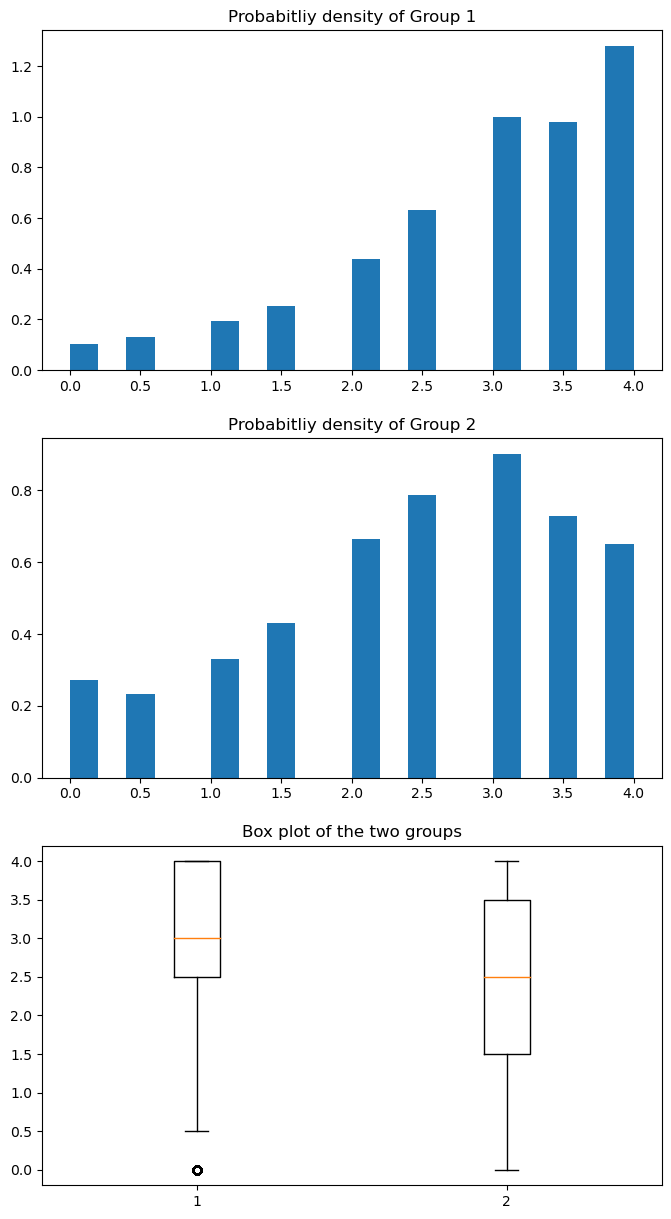

In [180]:
print("Group 1: Ratings of high popular movies")
print("Group 2: Ratings of less popular movies")
analysesAndTests(popularMoviesRatings, notSoPopularMoviesRatings, plots=1, verbose=1, tailedness = 'greater')

# Part 2)

In [181]:
moviesNames = moviesRatings.columns[:numberOfMovies]
moviesVsYear = dict()
for i in moviesNames:
    moviesVsYear[i] = int(i[i.find('(')+1:i.find(')')])
    
medianYear = np.median(np.array(list(moviesVsYear.values())))# 1999

oldMovies = []
newMovies = []
for i in moviesVsYear:
    if moviesVsYear[i] < medianYear:
        oldMovies.append(i)
    else:
        newMovies.append(i)

In [182]:
oldMoviesRatings = []
newMoviesRatings = []

for i in oldMovies:
    t = pd.to_numeric(moviesRatings[i],errors='coerce').values
    t = list(t[np.isfinite(t)])
    oldMoviesRatings += t
    
for i in newMovies:
    t = pd.to_numeric(moviesRatings[i],errors='coerce').values
    t = list(t[np.isfinite(t)])
    newMoviesRatings += t

Group 1: Ratings of Old movies
Group 2: Ratings of New movies
Group 1 v/s Group 2
Median of Group 1 ratings: 3.0 Median of Group 2 ratings: 3.0
ManWhitney test results: test statistic = 1502583861.0 p-value = 1.2849216001533932e-06
There is a significant difference


1

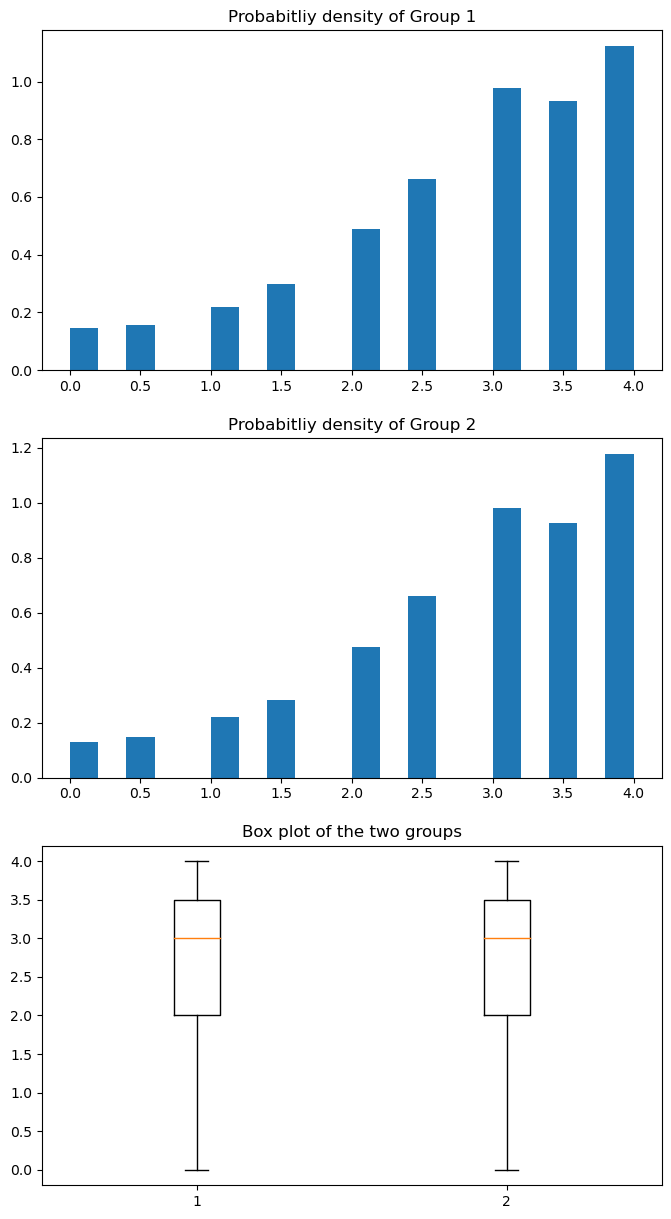

In [183]:
print("Group 1: Ratings of Old movies")
print("Group 2: Ratings of New movies")
analysesAndTests(oldMoviesRatings, newMoviesRatings, plots=1, verbose=1)

# Part 3)

Group 1: Ratings by females
Group 2: Ratings by males
Movie: Shrek (2001) Factor: Gender identity (1 = female; 2 = male; 3 = self-described)
Group 1 v/s Group 2
Median of Group 1 ratings: 3.5 Median of Group 2 ratings: 3.0
ManWhitney test results: test statistic = 96830.5 p-value = 0.050536625925559006
The difference is by chance


0

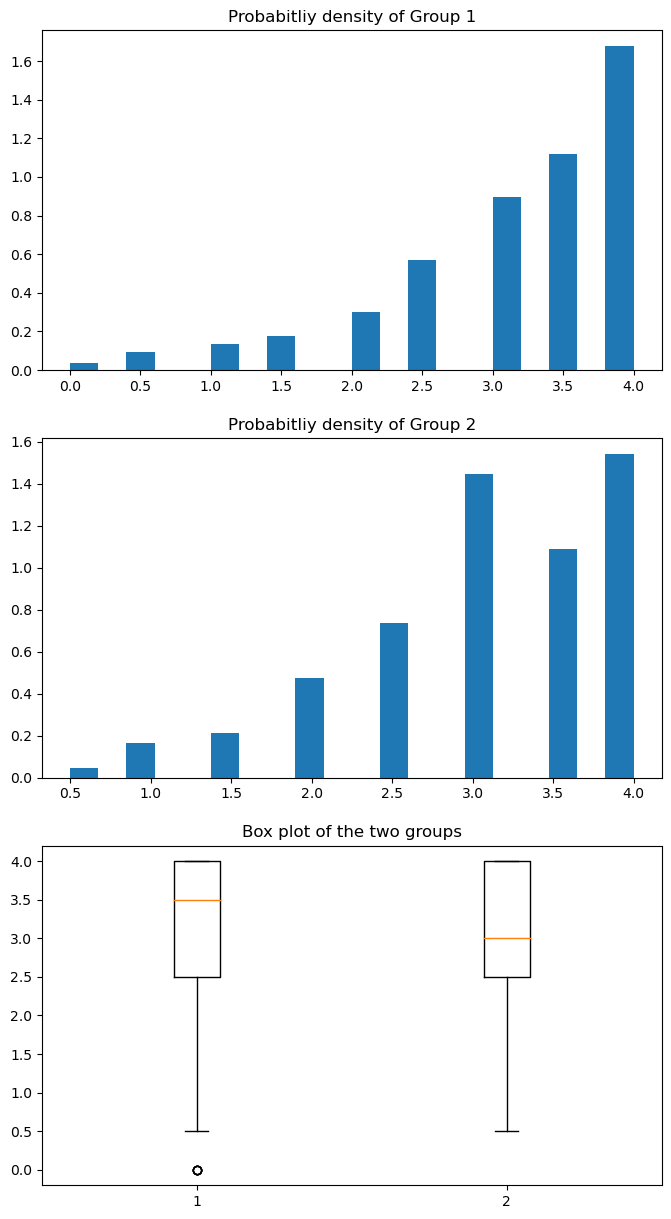

In [184]:
print("Group 1: Ratings by females")
print("Group 2: Ratings by males")
comparsionOnFactor('Shrek (2001)', 'Gender identity (1 = female; 2 = male; 3 = self-described)',
                   key1=1, key2=2, v=1, p=1)# => difference is not significant

# Part 4)

In [185]:
proportionFinder('Gender identity (1 = female; 2 = male; 3 = self-described)', key1=1, key2=2)

Count: 50 Proportion: 0.125 Percentage: 12.5


# Part 5)

Group 1: Ratings by people with no siblings
Group 2: Ratings by people with siblings
Movie: The Lion King (1994) Factor: Are you an only child? (1: Yes; 0: No; -1: Did not respond)
Group 1 v/s Group 2
Median of Group 1 ratings: 3.5 Median of Group 2 ratings: 4.0
ManWhitney test results: test statistic = 52929.0 p-value = 0.978419092554931
The difference is by chance


0

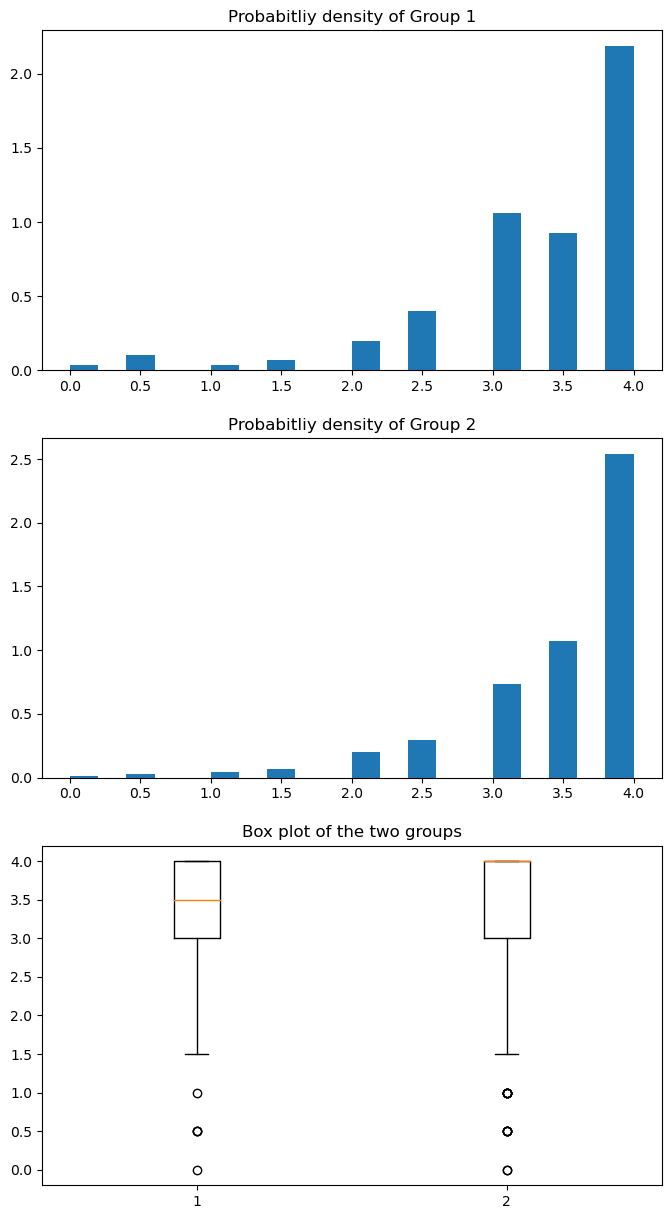

In [186]:
print("Group 1: Ratings by people with no siblings")
print("Group 2: Ratings by people with siblings")
comparsionOnFactor("The Lion King (1994)", "Are you an only child? (1: Yes; 0: No; -1: Did not respond)",
                   key1=1, key2=0, v=1, p=1, t='greater')# => difference is not significant

# Part 6)

In [187]:
proportionFinder("Are you an only child? (1: Yes; 0: No; -1: Did not respond)", key1=1, key2=0)

Count: 7 Proportion: 0.0175 Percentage: 1.7500000000000002


# Part 7)

Group 1: Ratings by the ones who enjoy movies alone
Group 2: Ratings by the ones who enjoy movies with company
Movie: The Wolf of Wall Street (2013) Factor: Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
Group 1 v/s Group 2
Median of Group 1 ratings: 3.5 Median of Group 2 ratings: 3.0
ManWhitney test results: test statistic = 56806.5 p-value = 0.05638214666114455
The difference is by chance


0

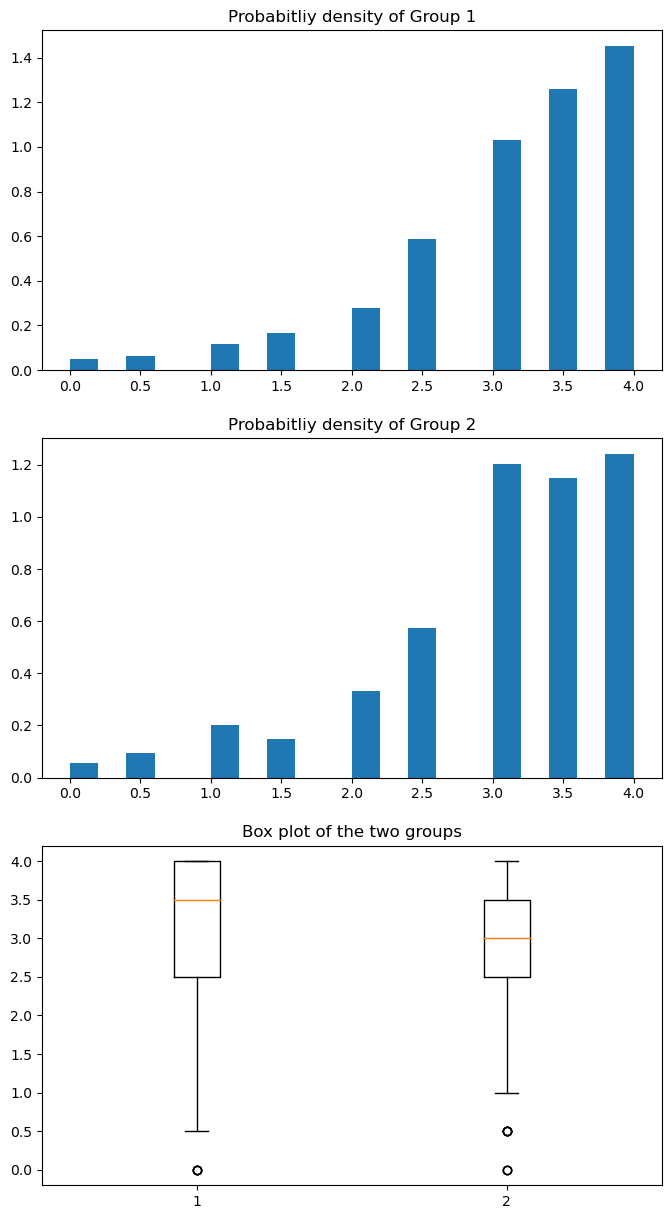

In [188]:
print("Group 1: Ratings by the ones who enjoy movies alone")
print("Group 2: Ratings by the ones who enjoy movies with company")
comparsionOnFactor("The Wolf of Wall Street (2013)", 
                   "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)",
                   key1=1, key2=0, v=1, p=1, t='greater')

# Part 8)

In [193]:
proportionFinder("Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)", key1=1, key2=0)

Count: 10 Proportion: 0.025 Percentage: 2.5


# Part 9)

Group 1: Ratings of Home Alone
Group 2: Ratings of Finding Nemo
Group 1 v/s Group 2
Median of Group 1 ratings: 3.5 Median of Group 2 ratings: 3.5
ManWhitney test results: test statistic = 358138.0 p-value = 8.815719392857246e-12
There is a significant difference
KS test results 0.15269080020897632 6.379397182836346e-10
There is a significant difference


1

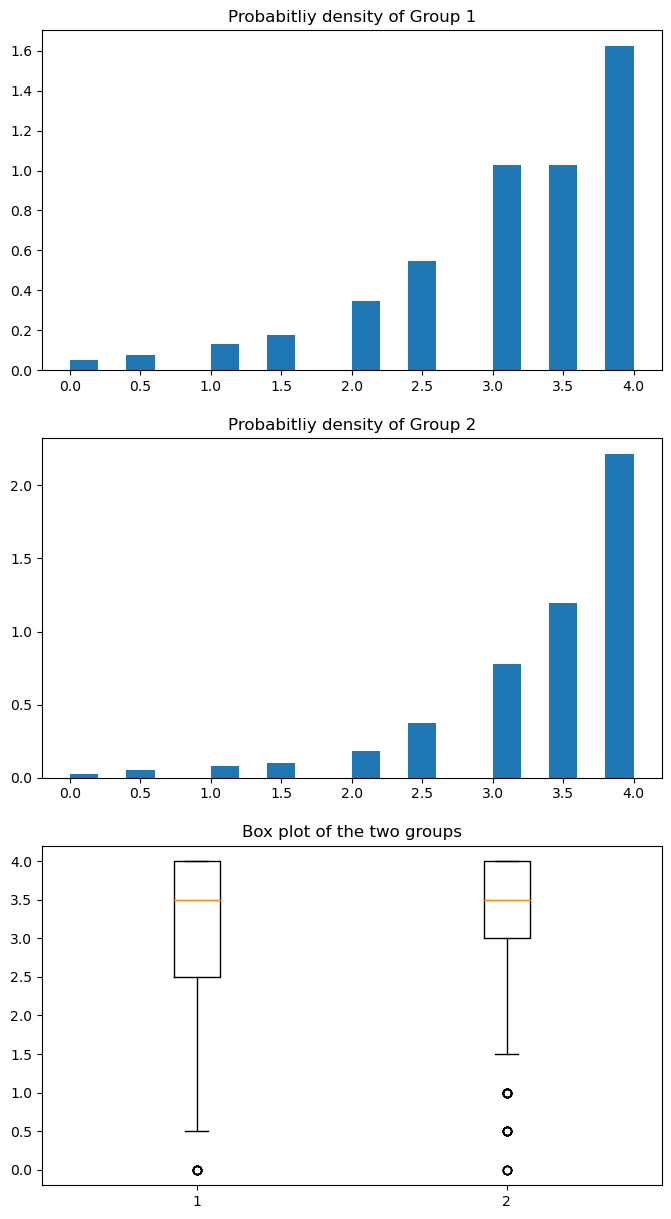

In [205]:
homealone = list(moviesRatings["Home Alone (1990)"].dropna().values)
findingNemo = list(moviesRatings["Finding Nemo (2003)"].dropna().values)
print("Group 1: Ratings of Home Alone")
print("Group 2: Ratings of Finding Nemo")
analysesAndTests(homealone, findingNemo, kstest=1, verbose =1, plots=1)

# Part 10)

In [211]:
def runKWtest(franchise, movieList):
    listofRatings = []
    for i in movieList:
        t = list(moviesRatings[i].dropna().values)
        listofRatings.append(t)
    s, p = stats.kruskal(*listofRatings)
    print("Test on:", franchise, "s:", s, "p:", p)
    if(p<alpha):
        print(franchise, "series is of inconsistent quality")
        return 1
    else:
        print(franchise, "series is of consistent quality")
        return 0
    
        

franchiseMovies = dict()
for i in ["Star Wars", "Harry Potter", "The Matrix", "Indiana Jones", 
          "Jurassic Park", "Pirates of the Caribbean", "Toy Story", "Batman"]:
    franchiseMovies[i] = []
    
for i in moviesRatings.columns:
    for j in franchiseMovies.keys():
        if j in i:
            franchiseMovies[j].append(i)

count = 0
for i in franchiseMovies:
    count += runKWtest(i, franchiseMovies[i])

print(count, "are of inconsistent quality.")

Test on: Star Wars s: 230.5841753686405 p: 8.01647736660335e-48
Star Wars series is of inconsistent quality
Test on: Harry Potter s: 3.331230732890868 p: 0.34331950837289205
Harry Potter series is of consistent quality
Test on: The Matrix s: 48.378866521305774 p: 3.1236517880781424e-11
The Matrix series is of inconsistent quality
Test on: Indiana Jones s: 45.79416340261569 p: 6.27277563979608e-10
Indiana Jones series is of inconsistent quality
Test on: Jurassic Park s: 46.59088064385298 p: 7.636930084362221e-11
Jurassic Park series is of inconsistent quality
Test on: Pirates of the Caribbean s: 20.64399756002606 p: 3.2901287079094474e-05
Pirates of the Caribbean series is of inconsistent quality
Test on: Toy Story s: 24.38599493626327 p: 5.065805156537524e-06
Toy Story series is of inconsistent quality
Test on: Batman s: 190.53496872634642 p: 4.2252969509030006e-42
Batman series is of inconsistent quality
7 are of inconsistent quality.


In [243]:
# Extra Credit
wall_street=moviesRatings[["Have you gambled or bet for money?","The Wolf of Wall Street (2013)"]]
ws=wall_street.dropna()

not_gamble=ws[ws["Have you gambled or bet for money?"]<4.0]
gamble=ws[ws["Have you gambled or bet for money?"]==4.0]
not_gamble_m=not_gamble["The Wolf of Wall Street (2013)"]
gamble_m=gamble["The Wolf of Wall Street (2013)"]

not_gamble_m=not_gamble_m.to_numpy()
gamble_m=gamble_m.to_numpy()

u,p=stats.mannwhitneyu(gamble_m,not_gamble_m, alternative = "greater")
print(u, p)
print("There is difference considering alpha 0.05")

46488.5 0.022499844084791644
There is difference considering alpha 0.05
